In [1]:
from sklearn.linear_model import LinearRegression
from pandas import DataFrame as df
from scipy import stats
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'Malgun Gothic'

import json
import folium

In [2]:
weather = pd.read_csv('data/2018날씨.csv', encoding='CP949')

In [3]:
#2018년, test16은 2019년거 제거해야 함
test7=pd.read_csv('data/서울특별시 공공자전거 시간대별 대여정보_201801_02.csv' ,parse_dates=['대여일자'],encoding='CP949')
test8=pd.read_csv('data/서울특별시 공공자전거 시간대별 대여정보_201803_04.csv' ,parse_dates=['대여일자'],encoding='CP949')
test9=pd.read_csv('data/서울특별시 공공자전거 시간대별 대여정보_201805.csv' ,parse_dates=['대여일자'],encoding='CP949')
test10=pd.read_csv('data/서울특별시 공공자전거 시간대별 대여정보_201806.csv' ,parse_dates=['대여일자'],encoding='CP949')
test11=pd.read_csv('data/서울특별시 공공자전거 시간대별 대여정보_201807.csv' ,parse_dates=['대여일자'],encoding='CP949')
test12=pd.read_csv('data/서울특별시 공공자전거 시간대별 대여정보_201808.csv' ,parse_dates=['대여일자'],encoding='CP949')
test13=pd.read_csv('data/서울특별시 공공자전거 시간대별 대여정보_201809.csv' ,parse_dates=['대여일자'],encoding='CP949')
test14=pd.read_csv('data/서울특별시 공공자전거 시간대별 대여정보_201810.csv' ,parse_dates=['대여일자'],encoding='CP949')
test15=pd.read_csv('data/서울특별시 공공자전거 시간대별 대여정보_201811.csv' ,parse_dates=['대여일자'],encoding='CP949')
test16=pd.read_csv('data/서울특별시 공공자전거 시간대별 대여정보_201812_201905.csv' ,parse_dates=['대여일자'],encoding='CP949')

In [4]:
weather

,월,평균기온,평균최고기온,평균최저기온,평균상대습도,최소상대습도,월합강수량,평균풍속,최대풍속,평균운량,일조율,합계 일사량,최심적설
0,1,-4.0,0.1,-7.3,48,16,8.5,1.9,7.2,4.3,65.01,158.99,3.5
1,2,-1.6,3.3,-5.9,45,13,29.6,2.2,6.3,3.9,66.53,309.28,4.1
2,3,8.1,13.6,3.8,59,13,49.5,1.9,6.9,5.2,56.38,446.41,0.0
3,4,13.0,18.5,8.1,55,8,130.3,2.0,8.8,4.7,56.54,513.19,0.0
4,5,18.2,23.3,13.4,63,22,222.0,1.7,8.0,5.4,52.66,561.24,0.0
5,6,23.1,28.4,18.9,63,19,171.5,1.7,5.7,5.9,53.51,602.59,0.0
6,7,27.8,32.1,24.2,68,29,185.6,1.5,4.2,5.1,52.64,561.10,0.0
7,8,28.8,33.3,25.2,65,25,202.6,1.7,7.1,5.8,55.19,517.16,0.0
8,9,21.5,26.0,17.6,61,23,68.5,1.6,5.7,5.1,58.60,470.96,0.0
9,10,13.1,18.6,8.5,59,16,120.5,1.5,6.1,3.7,69.43,403.34,0.0


In [5]:
date_2019=test16[test16['대여일자'].dt.year==2019].index
test16 =test16.drop(date_2019)
test16

,대여일자,성별,연령대코드,이용건수,이동거리,사용시간
0,2018-12-01,\N,~10대,1,1130,4
1,2018-12-01,\N,~10대,1,1660,72
2,2018-12-01,\N,~10대,1,5060,21
3,2018-12-01,\N,~10대,1,690,2
4,2018-12-01,\N,~10대,1,3020,15
...,...,...,...,...,...,...
460031,2018-12-31,M,30대,1,1010,6
460032,2018-12-31,M,40대,1,2340,26
460033,2018-12-31,\N,~10대,2,19870,103
460034,2018-12-31,F,30대,2,1380,14


In [6]:
test2018=pd.concat([test7,test8,test9,test10,test11,test12,test13,test14,test15,test16]) #데이터 합침
test2018.head()

,대여일자,성별,연령대코드,이용건수,이동거리,이동시간,사용시간
0,2018-01-01,F,~10대,1,1450,23.0,NaN
1,2018-01-01,F,20대,1,2130,15.0,NaN
2,2018-01-01,F,20대,1,3140,17.0,NaN
3,2018-01-01,F,20대,1,1240,5.0,NaN
4,2018-01-01,F,20대,1,1940,43.0,NaN


In [7]:
test2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6447020 entries, 0 to 460035
Data columns (total 7 columns):
 #   Column  Dtype         
---  ------  -----         
 0   대여일자    datetime64[ns]
 1   성별      object        
 2   연령대코드   object        
 3   이용건수    int64         
 4   이동거리    int64         
 5   이동시간    float64       
 6   사용시간    float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 393.5+ MB


In [8]:
test2018['월']=test2018['대여일자'].dt.month

In [9]:
data = test2018.groupby(['월'])[['이용건수']].agg('sum')
data

,이용건수
월,
1,160221
2,162914
3,434806
4,626234
5,864145
6,1107612
7,884366
8,770997
9,816849


# 날씨X이용건수

In [10]:
data = pd.merge(weather, data, on='월')

In [11]:
data

,월,평균기온,평균최고기온,평균최저기온,평균상대습도,최소상대습도,월합강수량,평균풍속,최대풍속,평균운량,일조율,합계 일사량,최심적설,이용건수
0,1,-4.0,0.1,-7.3,48,16,8.5,1.9,7.2,4.3,65.01,158.99,3.5,160221
1,2,-1.6,3.3,-5.9,45,13,29.6,2.2,6.3,3.9,66.53,309.28,4.1,162914
2,3,8.1,13.6,3.8,59,13,49.5,1.9,6.9,5.2,56.38,446.41,0.0,434806
3,4,13.0,18.5,8.1,55,8,130.3,2.0,8.8,4.7,56.54,513.19,0.0,626234
4,5,18.2,23.3,13.4,63,22,222.0,1.7,8.0,5.4,52.66,561.24,0.0,864145
5,6,23.1,28.4,18.9,63,19,171.5,1.7,5.7,5.9,53.51,602.59,0.0,1107612
6,7,27.8,32.1,24.2,68,29,185.6,1.5,4.2,5.1,52.64,561.10,0.0,884366
7,8,28.8,33.3,25.2,65,25,202.6,1.7,7.1,5.8,55.19,517.16,0.0,770997
8,9,21.5,26.0,17.6,61,23,68.5,1.6,5.7,5.1,58.60,470.96,0.0,816849
9,10,13.1,18.6,8.5,59,16,120.5,1.5,6.1,3.7,69.43,403.34,0.0,768666


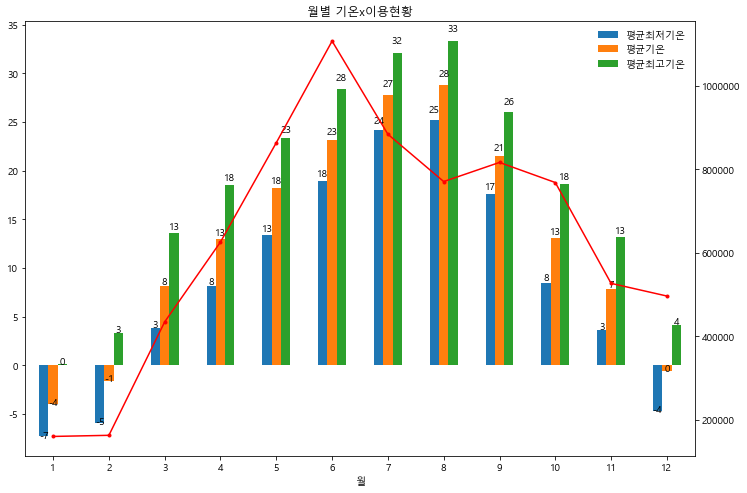

In [12]:
temp = data.groupby(['월'])[['평균최저기온', '평균기온', '평균최고기온']].agg('sum')
ax = temp.plot(kind='bar', figsize=(12, 8), rot=0, title="월별 기온x이용현황")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height*1.03), ha='center')
plt.box(False)
plt.legend(frameon=False)

plt.twinx()
plt.plot(data['이용건수'], 'r.-')
plt.show()

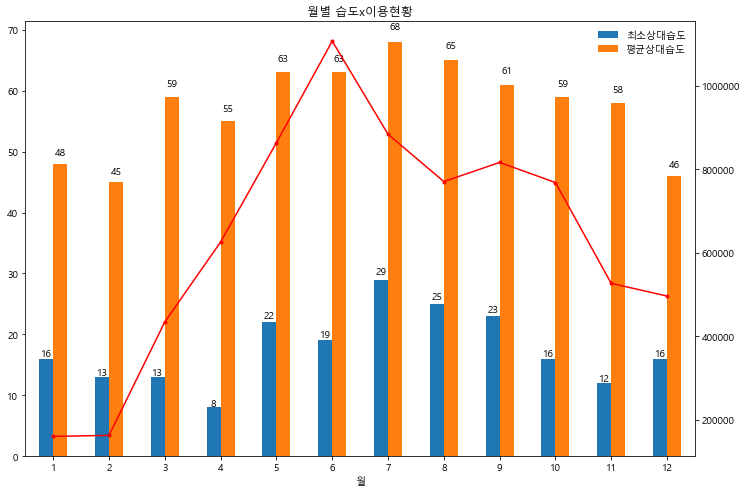

In [13]:
temp = data.groupby(['월'])[['최소상대습도', '평균상대습도']].agg('sum')
ax = temp.plot(kind='bar', figsize=(12, 8), rot=0, title="월별 습도x이용현황")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height*1.03), ha='center')
plt.box(False)
plt.legend(frameon=False)

plt.twinx()
plt.plot(data['이용건수'], 'r.-')
plt.show()

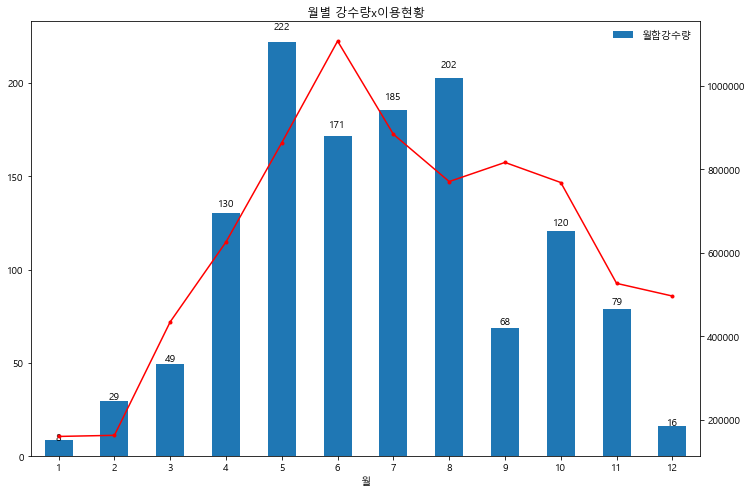

In [14]:
temp = data.groupby(['월'])[['월합강수량']].agg('sum')
ax = temp.plot(kind='bar', figsize=(12, 8), rot=0, title="월별 강수량x이용현황")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height*1.03), ha='center')
plt.box(False)
plt.legend(frameon=False)

plt.twinx()
plt.plot(data['이용건수'], 'r.-')
plt.show()

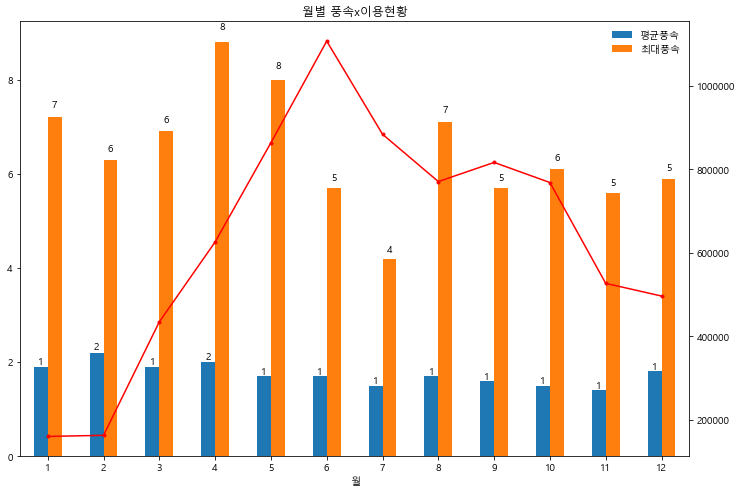

In [15]:
temp = data.groupby(['월'])[['평균풍속', '최대풍속']].agg('sum')
ax = temp.plot(kind='bar', figsize=(12, 8), rot=0, title="월별 풍속x이용현황")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height*1.03), ha='center')
plt.box(False)
plt.legend(frameon=False)

plt.twinx()
plt.plot(data['이용건수'], 'r.-')
plt.show()

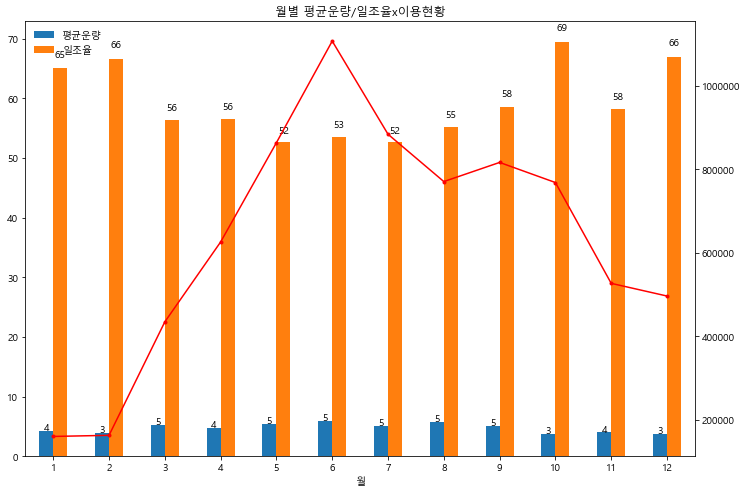

In [16]:
temp = data.groupby(['월'])[['평균운량', '일조율']].agg('sum')
ax = temp.plot(kind='bar', figsize=(12, 8), rot=0, title="월별 평균운량/일조율x이용현황")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height*1.03), ha='center')
plt.box(False)
plt.legend(frameon=False)

plt.twinx()
plt.plot(data['이용건수'], 'r.-')
plt.show()

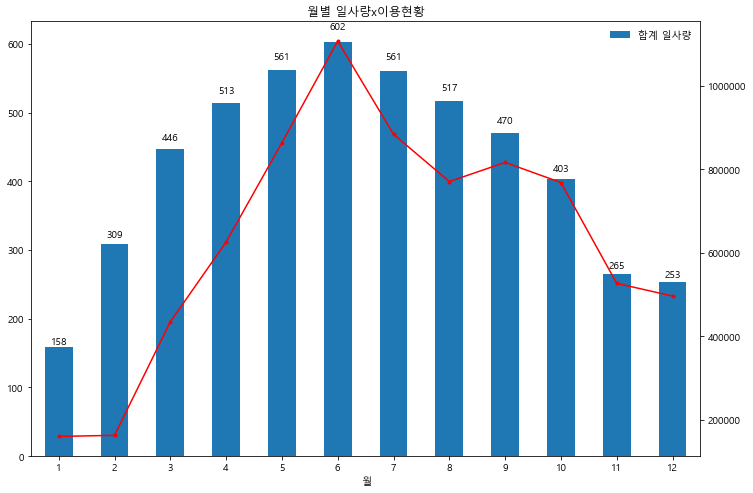

In [17]:
temp = data.groupby(['월'])[['합계 일사량']].agg('sum')
ax = temp.plot(kind='bar', figsize=(12, 8), rot=0, title="월별 일사량x이용현황")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height*1.03), ha='center')
plt.box(False)
plt.legend(frameon=False)

plt.twinx()
plt.plot(data['이용건수'], 'r.-')
plt.show()

# 날씨X사고

In [16]:
accident2018_month=pd.read_csv('data/2018교통사고_월.csv',encoding='CP949')

In [17]:
accident2018_month

,월,사고건수,사망자수,부상자수
0,1,62,0,62
1,2,68,2,68
2,3,94,0,100
3,4,129,0,135
4,5,146,3,161
5,6,206,3,230
6,7,141,1,156
7,8,125,3,128
8,9,171,0,185
9,10,154,2,167


In [18]:
data = pd.merge(accident2018_month, data, on='월')

In [19]:
data

,월,사고건수,사망자수,부상자수,평균기온,평균최고기온,평균최저기온,평균상대습도,최소상대습도,월합강수량,평균풍속,최대풍속,평균운량,일조율,합계 일사량,최심적설,이용건수
0,1,62,0,62,-4.0,0.1,-7.3,48,16,8.5,1.9,7.2,4.3,65.01,158.99,3.5,160221
1,2,68,2,68,-1.6,3.3,-5.9,45,13,29.6,2.2,6.3,3.9,66.53,309.28,4.1,162914
2,3,94,0,100,8.1,13.6,3.8,59,13,49.5,1.9,6.9,5.2,56.38,446.41,0.0,434806
3,4,129,0,135,13.0,18.5,8.1,55,8,130.3,2.0,8.8,4.7,56.54,513.19,0.0,626234
4,5,146,3,161,18.2,23.3,13.4,63,22,222.0,1.7,8.0,5.4,52.66,561.24,0.0,864145
5,6,206,3,230,23.1,28.4,18.9,63,19,171.5,1.7,5.7,5.9,53.51,602.59,0.0,1107612
6,7,141,1,156,27.8,32.1,24.2,68,29,185.6,1.5,4.2,5.1,52.64,561.10,0.0,884366
7,8,125,3,128,28.8,33.3,25.2,65,25,202.6,1.7,7.1,5.8,55.19,517.16,0.0,770997
8,9,171,0,185,21.5,26.0,17.6,61,23,68.5,1.6,5.7,5.1,58.60,470.96,0.0,816849
9,10,154,2,167,13.1,18.6,8.5,59,16,120.5,1.5,6.1,3.7,69.43,403.34,0.0,768666


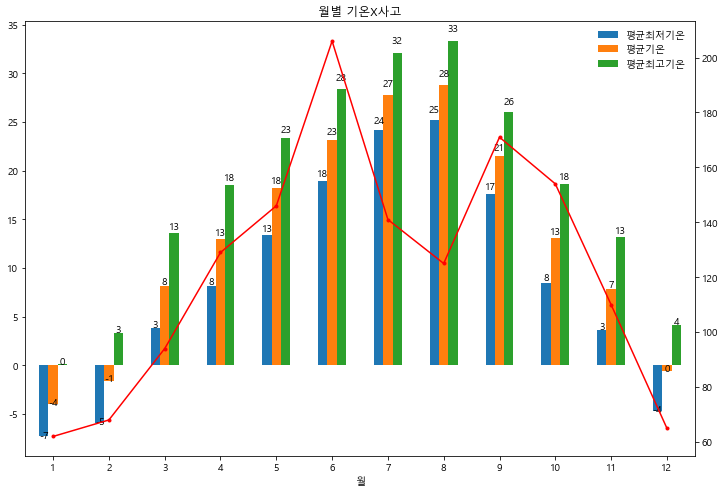

In [20]:
temp = data.groupby(['월'])[['평균최저기온', '평균기온', '평균최고기온']].agg('sum')
ax = temp.plot(kind='bar', figsize=(12, 8), rot=0, title="월별 기온X사고")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height*1.03), ha='center')
plt.box(False)
plt.legend(frameon=False)

plt.twinx()
plt.plot(data['사고건수'], 'r.-')
plt.show()

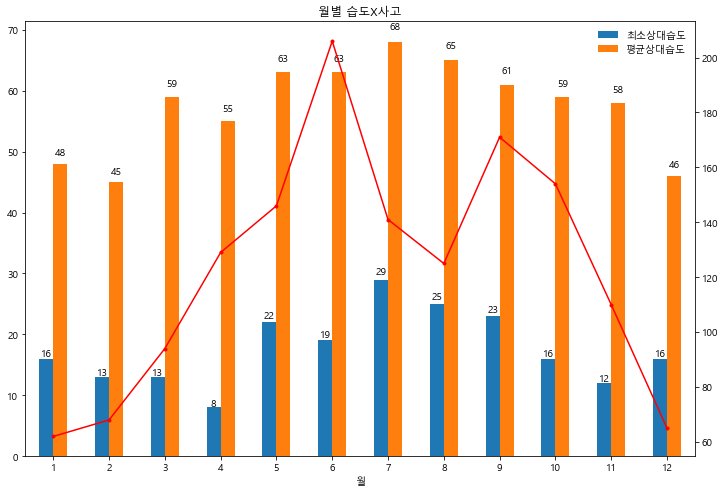

In [23]:
temp = data.groupby(['월'])[['최소상대습도', '평균상대습도']].agg('sum')
ax = temp.plot(kind='bar', figsize=(12, 8), rot=0, title="월별 습도X사고")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height*1.03), ha='center')
plt.box(False)
plt.legend(frameon=False)

plt.twinx()
plt.plot(data['사고건수'], 'r.-')
plt.show()

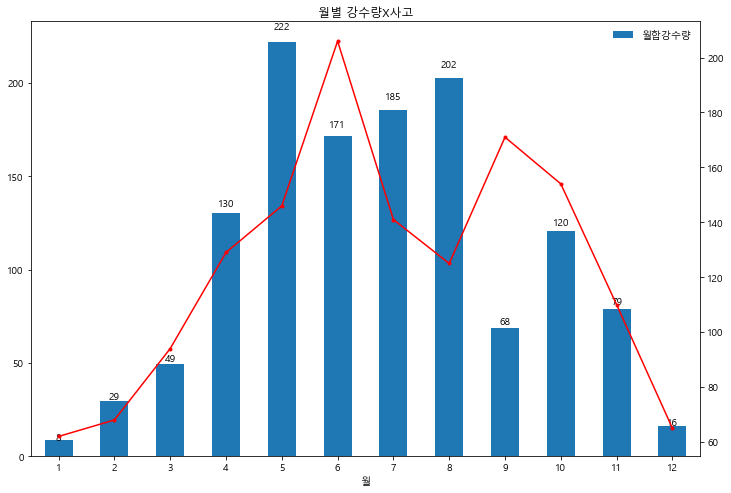

In [24]:
temp = data.groupby(['월'])[['월합강수량']].agg('sum')
ax = temp.plot(kind='bar', figsize=(12, 8), rot=0, title="월별 강수량X사고")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height*1.03), ha='center')
plt.box(False)
plt.legend(frameon=False)

plt.twinx()
plt.plot(data['사고건수'], 'r.-')
plt.show()

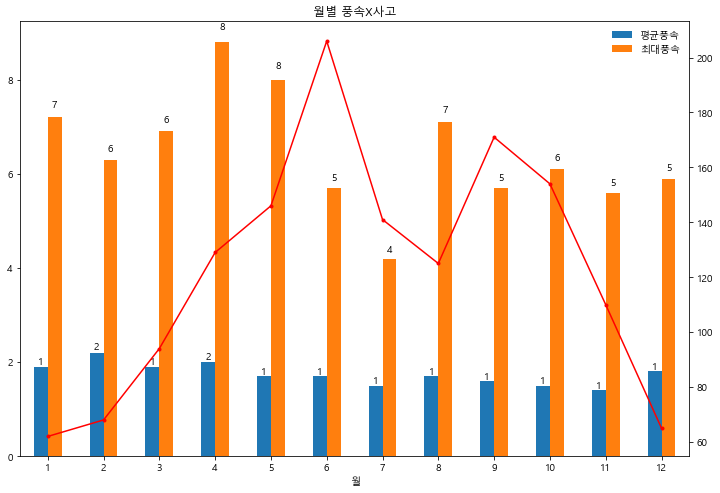

In [25]:
temp = data.groupby(['월'])[['평균풍속', '최대풍속']].agg('sum')
ax = temp.plot(kind='bar', figsize=(12, 8), rot=0, title="월별 풍속X사고")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height*1.03), ha='center')
plt.box(False)
plt.legend(frameon=False)

plt.twinx()
plt.plot(data['사고건수'], 'r.-')
plt.show()

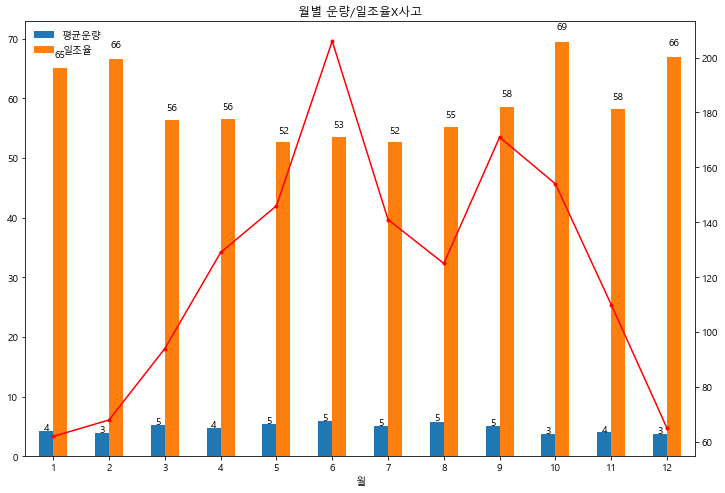

In [26]:
temp = data.groupby(['월'])[['평균운량', '일조율']].agg('sum')
ax = temp.plot(kind='bar', figsize=(12, 8), rot=0, title="월별 운량/일조율X사고")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height*1.03), ha='center')
plt.box(False)
plt.legend(frameon=False)

plt.twinx()
plt.plot(data['사고건수'], 'r.-')
plt.show()

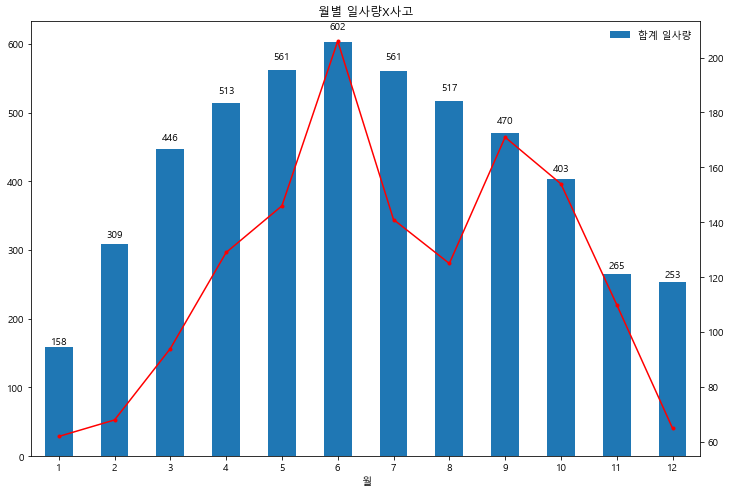

In [27]:
temp = data.groupby(['월'])[['합계 일사량']].agg('sum')
ax = temp.plot(kind='bar', figsize=(12, 8), rot=0, title="월별 일사량X사고")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height*1.03), ha='center')
plt.box(False)
plt.legend(frameon=False)

plt.twinx()
plt.plot(data['사고건수'], 'r.-')
plt.show()

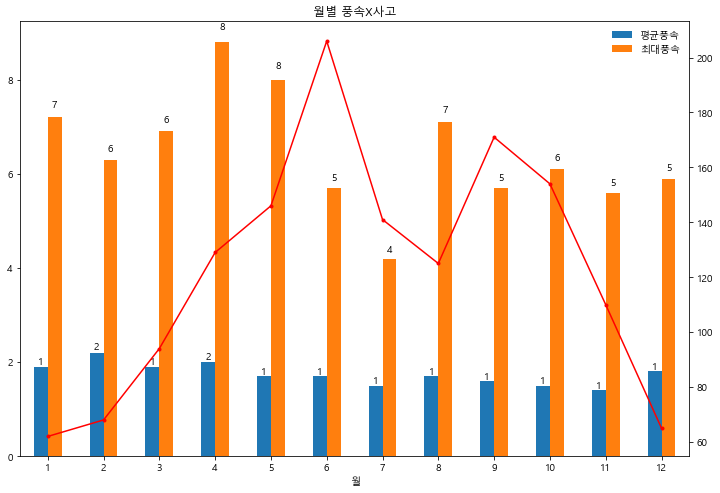

In [28]:
temp = data.groupby(['월'])[['평균풍속', '최대풍속']].agg('sum')
ax = temp.plot(kind='bar', figsize=(12, 8), rot=0, title="월별 풍속X사고")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height*1.03), ha='center')
plt.box(False)
plt.legend(frameon=False)

plt.twinx()
plt.plot(data['사고건수'], 'r.-')
plt.show()

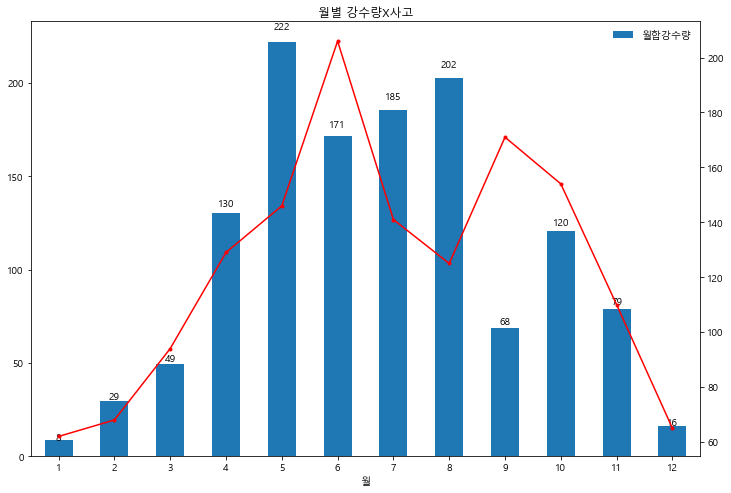

In [29]:
temp = data.groupby(['월'])[['월합강수량']].agg('sum')
ax = temp.plot(kind='bar', figsize=(12, 8), rot=0, title="월별 강수량X사고")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height*1.03), ha='center')
plt.box(False)
plt.legend(frameon=False)

plt.twinx()
plt.plot(data['사고건수'], 'r.-')
plt.show()

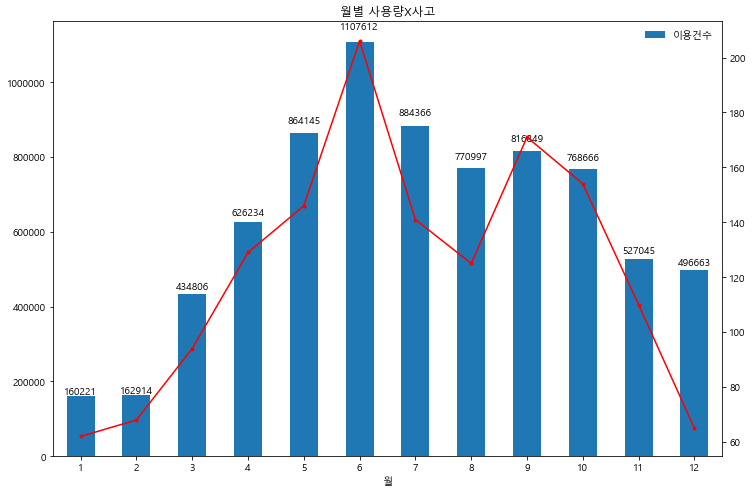

In [30]:
month = test2018.groupby(['월'])[['이용건수']].agg('sum')
ax=month.plot(kind='bar', figsize=(12, 8), rot=0, title="월별 사용량X사고")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height*1.03), ha='center')
plt.box(False)
plt.legend(frameon=False)

plt.twinx()
plt.plot(data['사고건수'], 'r.-')
plt.show()

# 상관관계 분석

In [31]:
x = data['평균기온']
y = data['이용건수']

# 피어슨 상관계수 검정
corr = stats.pearsonr(x, y)
corr

(0.8789522213073743, 0.0001664723421635261)

In [32]:
x = data['평균상대습도']
y = data['이용건수']

# 피어슨 상관계수 검정
corr = stats.pearsonr(x, y)
corr

(0.8285911335070992, 0.0008672381436652364)

In [33]:
x = data['월합강수량']
y = data['이용건수']

# 피어슨 상관계수 검정
corr = stats.pearsonr(x, y)
corr

(0.8052057130741667, 0.0015764150445295923)

In [34]:
x = data['평균풍속']
y = data['이용건수']

# 피어슨 상관계수 검정
corr = stats.pearsonr(x, y)
corr

(-0.6089077887533261, 0.035606465842519856)

In [35]:
x = data['일조율']
y = data['이용건수']

# 피어슨 상관계수 검정
corr = stats.pearsonr(x, y)
corr

(-0.605558314436986, 0.036915463402879205)

In [36]:
x = data['합계 일사량']
y = data['이용건수']

# 피어슨 상관계수 검정
corr = stats.pearsonr(x, y)
corr

(0.8373215482709322, 0.0006782138581675262)

In [37]:
x = data['평균기온']
y = data['사고건수']

# 피어슨 상관계수 검정
corr = stats.pearsonr(x, y)
corr

(0.8064176663982788, 0.0015313152274962782)

In [38]:
x = data['평균상대습도']
y = data['사고건수']

# 피어슨 상관계수 검정
corr = stats.pearsonr(x, y)
corr

(0.7687748674455182, 0.0034777336127783443)

In [39]:
x = data['월합강수량']
y = data['사고건수']

# 피어슨 상관계수 검정
corr = stats.pearsonr(x, y)
corr

(0.6927454664843841, 0.012514012998261824)

In [40]:
x = data['평균풍속']
y = data['사고건수']

# 피어슨 상관계수 검정
corr = stats.pearsonr(x, y)
corr

(-0.5249752055033506, 0.07968026751311755)

In [41]:
x = data['일조율']
y = data['사고건수']

# 피어슨 상관계수 검정
corr = stats.pearsonr(x, y)
corr

(-0.5308999919429713, 0.07573385308101399)

In [42]:
x = data['합계 일사량']
y = data['사고건수']

# 피어슨 상관계수 검정
corr = stats.pearsonr(x, y)
corr

(0.7974104747026568, 0.0018913657666033805)

In [43]:
x = data['이용건수']
y = data['사고건수']

# 피어슨 상관계수 검정
corr = stats.pearsonr(x, y)
corr

(0.9226704350155581, 1.9105864060870496e-05)

# 선형회귀 분석

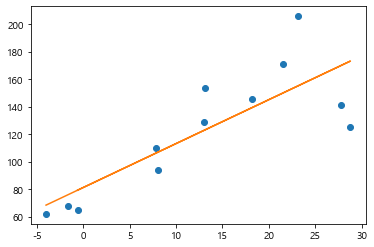

(0.8064176663982788, 0.0015313152274962782)

In [44]:
X = data['평균기온']
y = data['사고건수']

line_fitter = LinearRegression()
line_fitter.fit(X.values.reshape(-1, 1), y)

plt.plot(X, y, 'o')
plt.plot(X, line_fitter.predict(X.values.reshape(-1, 1)))
plt.show()

# 피어슨 상관계수 검정
corr = stats.pearsonr(X, y)
corr

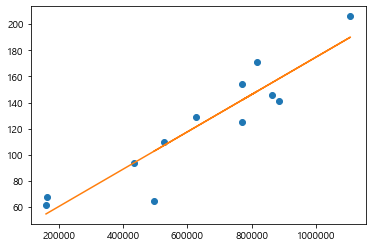

(0.9226704350155581, 1.9105864060870496e-05)

In [45]:
X = data['이용건수']
y = data['사고건수']

line_fitter = LinearRegression()
line_fitter.fit(X.values.reshape(-1, 1), y)

plt.plot(X, y, 'o')
plt.plot(X, line_fitter.predict(X.values.reshape(-1, 1)))
plt.show()

# 피어슨 상관계수 검정
corr = stats.pearsonr(X, y)
corr

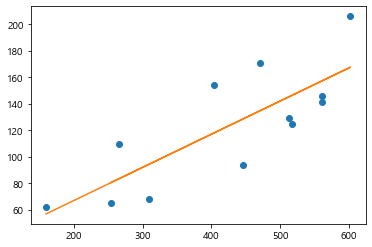

(0.7974104747026568, 0.0018913657666033805)

In [46]:
X = data['합계 일사량']
y = data['사고건수']

line_fitter = LinearRegression()
line_fitter.fit(X.values.reshape(-1, 1), y)

plt.plot(X, y, 'o')
plt.plot(X, line_fitter.predict(X.values.reshape(-1, 1)))
plt.show()

# 피어슨 상관계수 검정
corr = stats.pearsonr(X, y)
corr

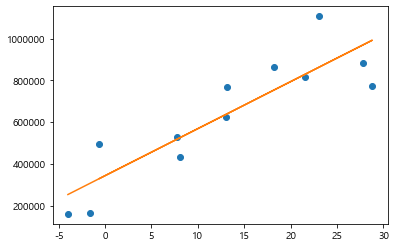

(0.8789522213073743, 0.0001664723421635261)

In [47]:
X = data['평균기온']
y = data['이용건수']

line_fitter = LinearRegression()
line_fitter.fit(X.values.reshape(-1, 1), y)

plt.plot(X, y, 'o')
plt.plot(X, line_fitter.predict(X.values.reshape(-1, 1)))
plt.show()

# 피어슨 상관계수 검정
corr = stats.pearsonr(X, y)
corr

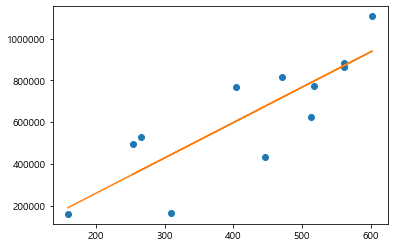

(0.8373215482709322, 0.0006782138581675262)

In [48]:
X = data['합계 일사량']
y = data['이용건수']

line_fitter = LinearRegression()
line_fitter.fit(X.values.reshape(-1, 1), y)

plt.plot(X, y, 'o')
plt.plot(X, line_fitter.predict(X.values.reshape(-1, 1)))
plt.show()

# 피어슨 상관계수 검정
corr = stats.pearsonr(X, y)
corr